# 3. Evaluation

Before we dive into how to use the preprocessed data we created to train a Deep Learning network, we first need to talk about how to evaluate the predicitions of our networks.

This notebook will give you an overview of the state-of-the-art evaluation metrics applied within the field of HAR. The metrics we will talk about include:

- Accuracy
- Confusion matrix
- Precision
- Recall
- F1-score
- Generalization gap

In the following, we will go over each of these metrics by evaluating a toy example. You will implement each evaluation metric from scratch as this will help you to better understand and interpret them.

**Note:** This notebook is highly inspired by https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/ 

## 3.1. Toy example

For simplicity reasons, we will not work with RWHAR dataset within this notebook, but rather use a toy example. 

Given three subjects which performed a set of 4 activities. Given that we already windowed the data and decided on a label for each window, each subject has a corresponding true label array. We call this the **ground truth** information.

In [7]:
labels = [0, 1, 2, 3]

gt_sbj1 = [1, 1, 1, 0, 0, 0, 2, 3, 3, 2]
gt_sbj2 = [0, 0, 1, 0, 3, 3, 0, 0, 1, 2]
gt_sbj3 = [3, 3, 3, 0, 0, 1, 1, 2, 2, 2]

Assume that we trained a Deep Learning network on the data of the first subject and evaluated it on the other two subjects. Applying the network now again on the data of each subject will return us three prediction arrays. We call said arrays the **train predicitions** (for subject 1) and **validation predictions** (for subject 2 and 3).

In [14]:
import numpy as np

pred_sbj1 = [1, 1, 0, 0, 2, 2, 2, 3, 3, 1]
pred_sbj2 = [0, 1, 1, 1, 3, 2, 1, 1, 0, 2]
pred_sbj3 = [0, 2, 3, 0, 1, 1, 1, 3, 0, 2]

train_gt = gt_sbj1
train_pred = pred_sbj1

val_gt = np.concatenate((gt_sbj2, gt_sbj3))
val_pred = np.concatenate((pred_sbj2, pred_sbj3))

We now have everything we need to calculate the evaluation metrics.

## 3.2. Accuracy

Classification accuracy is the ratio of the number of correct preditions out of all predictions that your algorithm made. It is therefore calculated as:

$$\frac{no. true\_preditions}{no. total\_predicitions}$$

### Task 1: Implement the accuracy evaluation metric

1. Implement a method which calculates the accuracy metric as defined above.
2. Calculate the per-subject, train and validation accuracy using the above defined arrays.

In [15]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

print('\nSubject 1 accuracy:')
print(accuracy_metric(gt_sbj1, pred_sbj1))

print('\nSubject 2 accuracy:')
print(accuracy_metric(gt_sbj2, pred_sbj2))

print('\nSubject 3 accuracy:')
print(accuracy_metric(gt_sbj3, pred_sbj3))

print('\nTraining accuracy:')
print(accuracy_metric(train_gt, train_pred))

print('\nValidation accuracy:')
print(accuracy_metric(val_gt, val_pred))


Subject 1 accuracy:
60.0

Subject 2 accuracy:
40.0

Subject 3 accuracy:
50.0

Training accuracy:
60.0

Validation accuracy:
45.0


## 3.3. True Positives, False Postives, True Negatives and False Negatives

In order to compute the precision, recall and f1-score metrics, we need to first talk about the four types one can classify the outcome of a classification. This is the concept of **true positives, false positives, true negatives and false negatives**. Given a prediction and its ground truth label, the outcome of the prediction for a label i can either be a:

- **True Positive (TP)**: the prediction and ground truth label are both of label i.
- **False Positive (FP)**: the predicition is falsely of prediction i, even though the ground truth label is some other label.
- **True Negative (TN)**: the predicition is not of prediction i, even though the ground truth label is of label i.
- **False Negative (FN)**: the prediction and ground truth label are both not of label i.

For a multiclass problem, this leaves us for each label with a count of TP, FP, TN and FN. In the following we will calculate the TP, FP, TN and FN values for each of the four labels of our toy example.

In [35]:
def compute_tp_tn_fn_fp(y_act, y_pred, label):
    y_act = pd.Series(y_act)
    y_pred = pd.Series(y_pred)
    tp = sum((y_act == label) & (y_pred == label))
    tn = sum((y_act != label) & (y_pred != label))
    fn = sum((y_act == label) & (y_pred != label))
    fp = sum((y_act != label) & (y_pred == label))
    return tp, tn, fp, fn

tp_0, tn_0, fp_0, fn_0 = compute_tp_tn_fn_fp(gt_sbj1, pred_sbj1, 0)
tp_1, tn_1, fp_1, fn_1 = compute_tp_tn_fn_fp(gt_sbj1, pred_sbj1, 1)
tp_2, tn_2, fp_2, fn_2 = compute_tp_tn_fn_fp(gt_sbj1, pred_sbj1, 2)
tp_3, tn_3, fp_3, fn_3 = compute_tp_tn_fn_fp(gt_sbj1, pred_sbj1, 3)

print('\nSubject 1 TP, FP, TN and FN:')
print('\nLabel 0:')
print('True Positives: {0}, False Positives: {1}, True Negatives: {2}, False Negatives: {3}'.format(tp_0, tn_0, fp_0, fn_0))
print('\nLabel 1:')
print('True Positives: {0}, False Positives: {1}, True Negatives: {2}, False Negatives: {3}'.format(tp_1, tn_1, fp_1, fn_1))
print('\nLabel 2:')
print('True Positives: {0}, False Positives: {1}, True Negatives: {2}, False Negatives: {3}'.format(tp_2, tn_2, fp_2, fn_2))
print('\nLabel 3:')
print('True Positives: {0}, False Positives: {1}, True Negatives: {2}, False Negatives: {3}'.format(tp_3, tn_3, fp_3, fn_3))


Subject 1 TP, FP, TN and FN:

Label 0:
True Positives: 1, False Positives: 6, True Negatives: 1, False Negatives: 2

Label 1:
True Positives: 2, False Positives: 6, True Negatives: 1, False Negatives: 1

Label 2:
True Positives: 1, False Positives: 6, True Negatives: 2, False Negatives: 1

Label 3:
True Positives: 2, False Positives: 8, True Negatives: 0, False Negatives: 0


## 3.3. Precision, Recall and F1-score

Precision, Recall and F1-score are the most central metrics when it comes classification problems. Each of them assesses a differnt viewpoint of how your algorithm solved the classification problem for a specific label. In the following we will go over how to compute each metric, compute them for each label and take the average across labels to obtain a final assessment for our toy example.

### 3.3.1. Precision

For a class label i, precision is the fraction of correct predictions for the label at hand out of all instances where the algorithm predicted the label to be i. For a class label i it is computed as:

$$P_i = \frac{TP_i}{TP_i + FP_i} \text{ for given class i}$$

#### Task 2: Implement the precision evaluation metric

1. For each label calculate the TP, FP, TN and FN values and calculate the precision value as defined above.
2. Calculate the average precision across all labels, i.e. add up the precision value for all labels and divide it by the number of labels.

In [29]:
def precision(actual, predicted, labels):
    total_prec = 0
    for label in labels:
        tp, tn, fp, fn = compute_tp_tn_fn_fp(actual, predicted, label)
        print('Precision Label {0}:'.format(label))
        prec = tp / (tp + fp) * 100
        print(prec)
        total_prec += prec
    print('Average Precision:')
    print(total_prec / len(labels))
    
print('\nSubject 1 precision:')
precision(gt_sbj1, pred_sbj1, labels)

print('\nSubject 2 precision:')
precision(gt_sbj2, pred_sbj2, labels)

print('\nSubject 3 precision:')
precision(gt_sbj3, pred_sbj3, labels)

print('\nTraining precision:')
precision(train_gt, train_pred, labels)

print('\nValidation precision:')
precision(val_gt, val_pred, labels)


Subject 1 precision:
Precision Label 0:
50.0
Precision Label 1:
66.66666666666666
Precision Label 2:
33.33333333333333
Precision Label 3:
100.0
Average Precision:
62.5

Subject 2 precision:
Precision Label 0:
50.0
Precision Label 1:
20.0
Precision Label 2:
50.0
Precision Label 3:
100.0
Average Precision:
55.0

Subject 3 precision:
Precision Label 0:
33.33333333333333
Precision Label 1:
66.66666666666666
Precision Label 2:
50.0
Precision Label 3:
50.0
Average Precision:
50.0

Training precision:
Precision Label 0:
50.0
Precision Label 1:
66.66666666666666
Precision Label 2:
33.33333333333333
Precision Label 3:
100.0
Average Precision:
62.5

Validation precision:
Precision Label 0:
40.0
Precision Label 1:
37.5
Precision Label 2:
50.0
Precision Label 3:
66.66666666666666
Average Precision:
48.541666666666664


### 3.3.2. Recall

Recall is the fraction of correct predictions for the label at hand over all instances which have the label i. For a class label i it is computed as:

$$R_i =\frac{TP_i}{TP_i + FN_i} \text{ for given class i}$$

#### Task 3: Implement the recall evaluation metric

1. For each label calculate the TP, FP, TN and FN values and calculate the recall value as defined above.
2. Calculate the average recall across all labels, i.e. add up the recall value for all labels and divide it by the number of labels.

In [30]:
def recall(actual, predicted, labels):
    total_rec = 0
    for label in labels:
        tp, tn, fp, fn = compute_tp_tn_fn_fp(actual, predicted, label)
        print('Recall Label {0}:'.format(label))
        rec = tp / (tp + fn) * 100
        print(rec)
        total_rec += rec
    print('Average Recall:')
    print(total_rec / len(labels))
    
print('\nSubject 1 recall:')
recall(gt_sbj1, pred_sbj1, labels)

print('\nSubject 2 recall:')
recall(gt_sbj2, pred_sbj2, labels)

print('\nSubject 3 recall:')
recall(gt_sbj3, pred_sbj3, labels)

print('\nTraining recall:')
recall(train_gt, train_pred, labels)

print('\nValidation recall:')
recall(val_gt, val_pred, labels)


Subject 1 recall:
Recall Label 0:
33.33333333333333
Recall Label 1:
66.66666666666666
Recall Label 2:
50.0
Recall Label 3:
100.0
Average Recall:
62.5

Subject 2 recall:
Recall Label 0:
20.0
Recall Label 1:
50.0
Recall Label 2:
100.0
Recall Label 3:
50.0
Average Recall:
55.0

Subject 3 recall:
Recall Label 0:
50.0
Recall Label 1:
100.0
Recall Label 2:
33.33333333333333
Recall Label 3:
33.33333333333333
Average Recall:
54.16666666666666

Training recall:
Recall Label 0:
33.33333333333333
Recall Label 1:
66.66666666666666
Recall Label 2:
50.0
Recall Label 3:
100.0
Average Recall:
62.5

Validation recall:
Recall Label 0:
28.57142857142857
Recall Label 1:
75.0
Recall Label 2:
50.0
Recall Label 3:
40.0
Average Recall:
48.39285714285714


### 3.3.3. F1-score

The F1-score combines both recall and precision into one measure. It is computed as the harmonic mean of precision and recall, i.e.:

$$F_i = 2 * \frac{P_i * R_i}{P_i + R_i}$$

#### Task 3: Implement the F1-score evaluation metric

1. For each label calculate the TP, FP, TN and FN values and calculate the recall and precision value as defined above.
2. Calculate the counter and denominator of the F1-score formula and compute the F1-score for the given label
3. Calculate the average F1-score across all labels, i.e. add up the F1-score value for all labels and divide it by the number of labels.

In [34]:
def f1_score(actual, predicted, labels):
    total_f1 = 0
    for label in labels:
        tp, tn, fp, fn = compute_tp_tn_fn_fp(actual, predicted, label)
        print('F1-score Label {0}:'.format(label))
        rec = tp / (tp + fn)
        prec = tp / (tp + fp)
        counter = prec * rec
        denominator = prec + rec
        f1 = 2 * (counter / denominator) * 100
        print(f1)
        total_f1 += f1
    print('Average F1-score:')
    print(total_f1 / len(labels))
    
print('\nSubject 1 F1-score:')
f1_score(gt_sbj1, pred_sbj1, labels)

print('\nSubject 2 F1-score:')
f1_score(gt_sbj2, pred_sbj2, labels)

print('\nSubject 3 F1-score:')
f1_score(gt_sbj3, pred_sbj3, labels)

print('\nTraining F1-score:')
f1_score(train_gt, train_pred, labels)

print('\nValidation F1-score:')
f1_score(val_gt, val_pred, labels)


Subject 1 F1-score:
F1-score Label 0:
40.0
F1-score Label 1:
66.66666666666666
F1-score Label 2:
40.0
F1-score Label 3:
100.0
Average F1-score:
61.666666666666664

Subject 2 F1-score:
F1-score Label 0:
28.571428571428577
F1-score Label 1:
28.571428571428577
F1-score Label 2:
66.66666666666666
F1-score Label 3:
66.66666666666666
Average F1-score:
47.61904761904762

Subject 3 F1-score:
F1-score Label 0:
40.0
F1-score Label 1:
80.0
F1-score Label 2:
40.0
F1-score Label 3:
40.0
Average F1-score:
50.0

Training F1-score:
F1-score Label 0:
40.0
F1-score Label 1:
66.66666666666666
F1-score Label 2:
40.0
F1-score Label 3:
100.0
Average F1-score:
61.666666666666664

Validation F1-score:
F1-score Label 0:
33.33333333333333
F1-score Label 1:
50.0
F1-score Label 2:
50.0
F1-score Label 3:
50.0
Average F1-score:
45.83333333333333


## 3.3. Confusion matrix

A confusion matrix gives you a tabular overview of all predicitions compared to the ground truth values. The counts of actual labels are oriented horizontally, i.e. column-wise. The counts of predicted labels are oriented vertically, i.e. row-wise. A perfect confusion matrix would be a diagonal matrix, i.e. all labels are correctly predicted and have the same predicted label and ground truth label.

You can use a confusion matrix to quickly spot which classes your algorithm might have struggled with the most.

### Task 3: Implement the F1-score evaluation metric

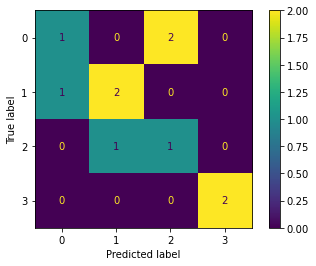

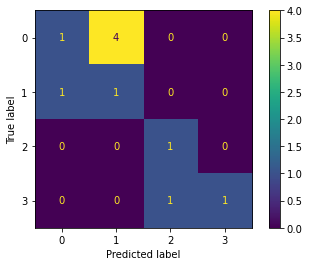

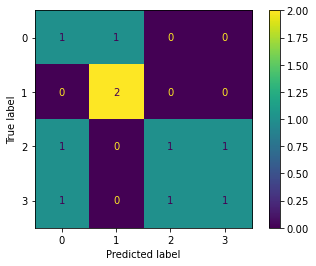

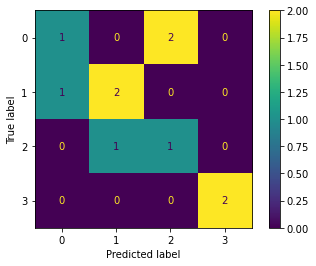

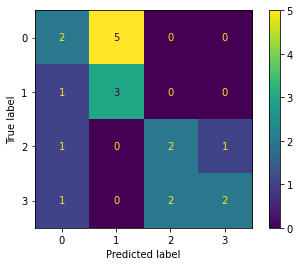

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time 
def plot_confusion_matrix(actual, predicted, labels):
    cm = confusion_matrix(actual, predicted, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot() 
    
plot_confusion_matrix(gt_sbj1, pred_sbj1, labels)

plot_confusion_matrix(gt_sbj2, pred_sbj2, labels)

plot_confusion_matrix(gt_sbj3, pred_sbj3, labels)

plot_confusion_matrix(train_gt, train_pred, labels)

plot_confusion_matrix(val_gt, val_pred, labels)
